# <center>Model of Power output from wind turbine</center>


***

In [1]:
#Load libraries required for this notebook
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

## 1. Read in and familiarise ourselves with the dataset

In [3]:
# Read in the powerproduction dataset from the Data folder in the repository. Although it is a text file, we can read it in as a csv file, such is the format of the data contained within.
data = pd.read_csv('Data/powerproduction.txt')

In [4]:
# Complete a statistical summary of the dataset
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


From this we can see there are 500 data points of speed and corresponding power. The average speed is 12.59 and average power outpur is 48. Units are not given in the dataset, but based on some research, we will assume the units of speed are m/s (Metres per second) and the power output in MW (MegaWatts)
[https://en.wikipedia.org/wiki/Wind_turbine_design#Design_specification](https://en.wikipedia.org/wiki/Wind_turbine_design#Design_specification)

In [5]:
# View the head of the dataset
data.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [6]:
# View the head of the dataset
data.tail(20)

,speed,power
480,23.974,94.270
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


At the outset, viewing the head and the tail of the dataset is always a good idea to give us a flavour of the data contained within and to give confidence that the dataset has no obvious flaws or quirks

In [7]:
df = pd.DataFrame(data)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

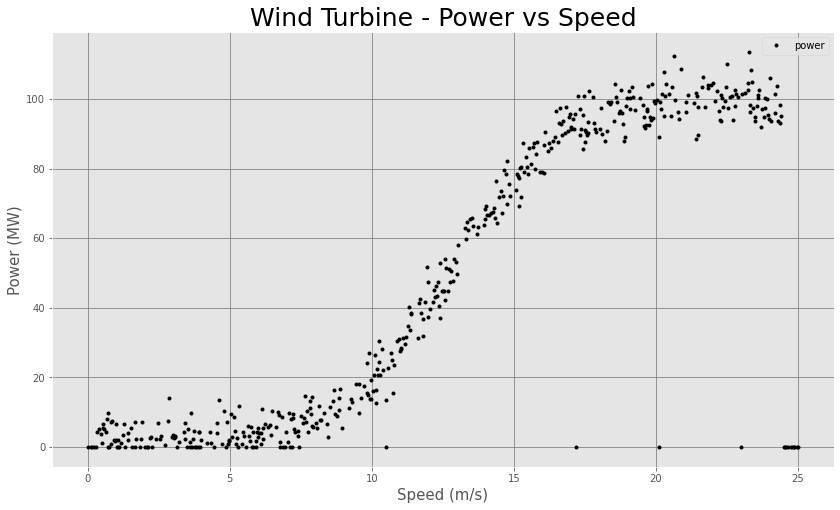

In [8]:
# Plot the values.
df.plot(x="speed", y="power", style='k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.show

From a quick observation of the data, we can see that the relationship between Power and Speed is in the form of a sigmoid, where somewhere between about 7m/s and 17m/s wind speed is where the Power generated varies from <20MW to approximately 100MW. Outside the window of 7m/s to 17m/s there is relatively litte change with increasing or decreasiing wind speed.<br>
It is worth noting that there are a number of outliers showing where zero power is generated despite considerable wind speed being recorded. Because the Power in each of these outliers is exactly 0MW,it is assumed that there is some operational issue with the turbine and it is not working as per normal at these data points. This may be something worth notifying the turbine operator about. However, When modelling it would be worth pre-processing this data to ignore such obvious outliers, as these will skew any model trying to obtain normal operation modelling.

## 2. Pre process the data

From our above observation, we see there are outliers. For each of these outliers, the Power output is zero eventhough the wind speed is considerable. We could simply omit any data point where we see a zero power, but this would not be the best thing to do, as there is a much higher occurance of 0MW Power when the wind speed in approx <7.5m/s, which could indicate that these particular zero readings are accurate, real and not actual outliers. So, we really only want to rule out those zero Power readings when the wind speed is >7.5m/s. 

We will use the Standard Deviation of the data as a measure of whether the data point should be considered and outlier or not.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]

In [10]:
#from sklearn.preprocessing import PolynomialFeatures
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 15.860


In [12]:
# identify outliers in the training dataset
lof = LocalOutlierFactor(n_neighbors=50)
yhat = lof.fit_predict(X_train)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<function matplotlib.pyplot.show(close=None, block=None)>

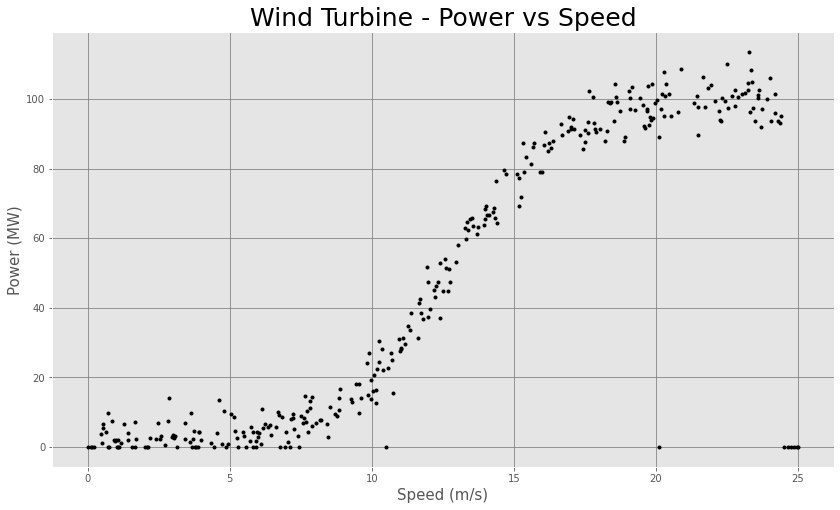

In [13]:
# Plot the values.
plt.plot(X_train, y_train,'k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.show

In [25]:
# fit the model
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

NameError: name 'PolynomialFeatures' is not defined

In [15]:
y_pred = model.predict(X_poly)

In [16]:
# Plot the values.
plt.plot(X_train, y_train,'k.')
plt.plot(X_train, y_pred,'r.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.show

In [17]:
# evaluate the model
poly_reg = PolynomialFeatures(degree = 5)

X_test_poly = poly_reg.fit_transform(X_test)


yhat = model.predict(X_test_poly)
# evaluate predictions
len(X_test_poly)

In [18]:
#len(yhat)

In [19]:
#mae = mean_absolute_error(X_test, yhat)
#print('MAE: %.3f' % mae)

In [20]:
#from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
#lof = LocalOutlierFactor(n_neighbors=30)
#yhat = lof.fit_predict(X_train)
#yhat

In [21]:
#len(yhat)

In [22]:
#X_train, y_train

In [23]:
#len(y_train)

In [24]:
# select all rows that are not outliers
#mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

NameError: name 'mask' is not defined

In [ ]:
len(X_train)

<function matplotlib.pyplot.show(close=None, block=None)>

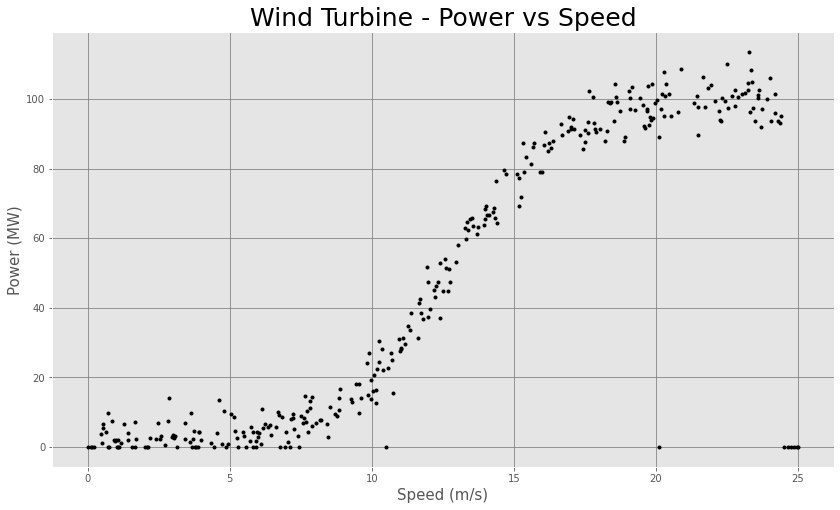

In [30]:
# Plot the values.
plt.plot(X_train, y_train, 'k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.show

In [ ]:
### Linear regression

In [26]:
Speed = df['speed']
Power = df["power"]

In [27]:
x = Speed.to_numpy()
y = Power.to_numpy()

In [28]:
m,c = np.polyfit(x, y, 1)
m, c

(4.917595665404667, -13.899902630519604)

<function matplotlib.pyplot.show(close=None, block=None)>

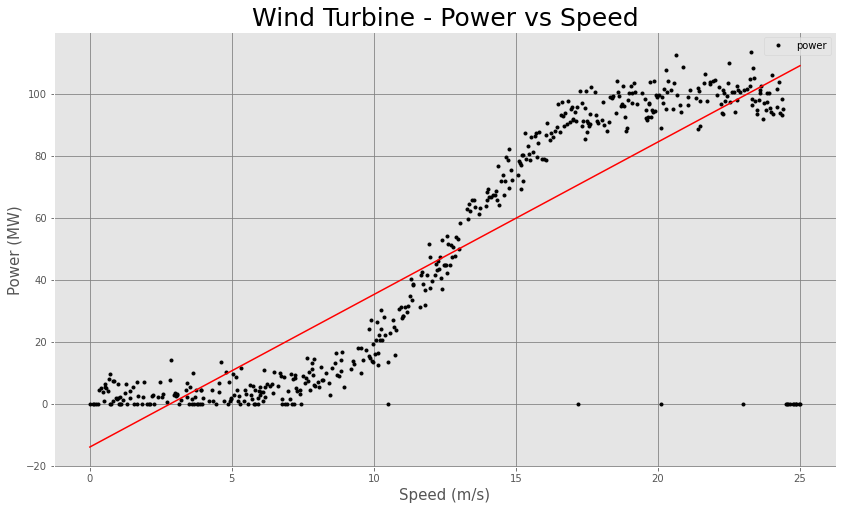

In [29]:
# Plot the values.
df.plot(x="speed", y="power", style='k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.plot(x, m* x + c, 'r-')
plt.show

In [ ]:
a, b, c = np.polyfit(x, y, 2)
a, b, c

In [ ]:
# Plot the values.
df.plot(x="speed", y="power", style='k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.plot(x, a * x *x + b *x +c, 'r-')
plt.show

In [31]:
a, b, c, d = np.polyfit(x, y, 3)
a, b, c, d

(-0.05241926693075328,
 1.8948575085944765,
 -12.94285866377895,
 19.201302460410645)

<function matplotlib.pyplot.show(close=None, block=None)>

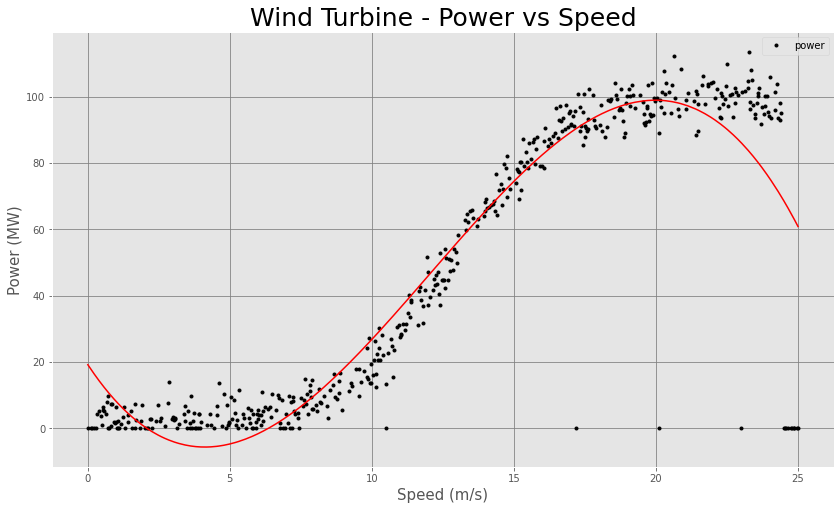

In [32]:
# Plot the values.
df.plot(x="speed", y="power", style='k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.plot(x, a * x *x*x + b *x*x +c *x +d, 'r-')
plt.show

In [33]:
a, b, c, d, e = np.polyfit(x, y, 4)
a, b, c, d, e

(-0.0029185021760123318,
 0.09319652853364176,
 -0.43377154469290835,
 -0.16673107196509254,
 3.893585441377973)

<function matplotlib.pyplot.show(close=None, block=None)>

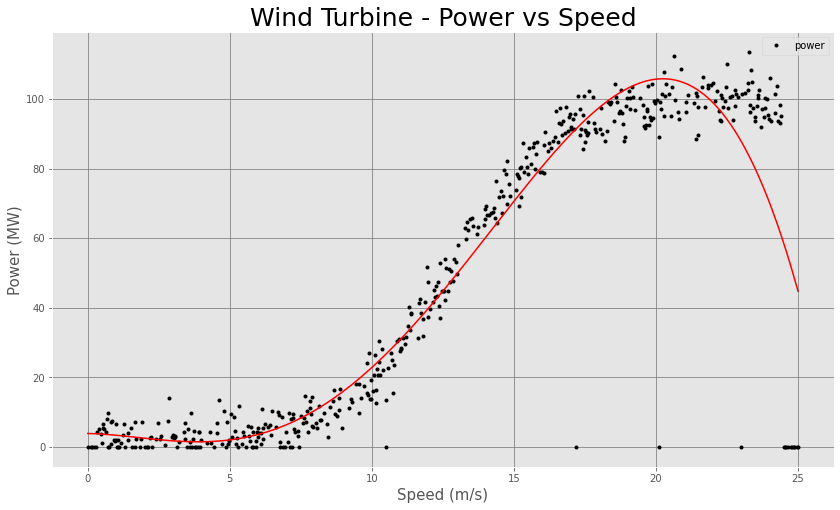

In [34]:
# Plot the values.
df.plot(x="speed", y="power", style='k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.plot(x, a * x *x*x*x + b *x*x*x +c *x*x +d*x +e, 'r-')
plt.show

In [35]:
a, b, c, d, e, f = np.polyfit(x, y, 5)
a, b, c, d, e, f

(-6.257309465458152e-05,
 0.0009922544409167618,
 0.0062521376162049105,
 0.38194178023881886,
 -3.073944739598326,
 6.229812637151732)

<function matplotlib.pyplot.show(close=None, block=None)>

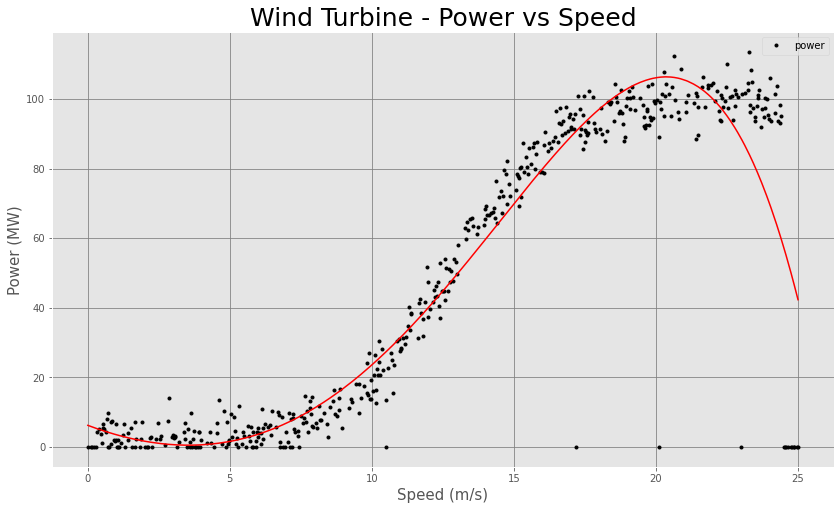

In [36]:
# Plot the values.
df.plot(x="speed", y="power", style='k.')
plt.title('Wind Turbine - Power vs Speed', size=25)
plt.xlabel('Speed (m/s)', size=15)
plt.ylabel('Power (MW)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.plot(x, a * x *x*x*x*x + b *x*x*x*x +c *x*x*x +d*x*x +e*x +f, 'r-')
plt.show